In [1]:
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
path = "./eval_data_10k/"

In [3]:
def get_results(foldername, tname):
    if tname == "ph":
        results = []
        for i in range(1,11):
            results.append(np.load(path+foldername+"/results_cv"+str(i)+".npy", allow_pickle=True)[1:6])
        return np.stack(tuple(results))
    elif tname == "pl":
        return np.load(path+foldername+"/results.npy", allow_pickle=True)[0][1:6]


### Kruskal Test

In [4]:
svc_ph_r = get_results(foldername="svc_ph", tname="ph").T
cnn_ph_r = get_results(foldername="cnn_ph", tname="ph").T
lstm_ph_r = get_results(foldername="lstm_ph", tname="ph").T
cnn_ph_eg_r = get_results(foldername="cnn_ph_eg", tname="ph").T
lstm_ph_eg_r = get_results(foldername="lstm_ph_eg", tname="ph").T
svc_ph_r[3:]= svc_ph_r[3:].mean(axis=0)
cnn_ph_r[3:]= cnn_ph_r[3:].mean(axis=0)
lstm_ph_r[3:]= lstm_ph_r[3:].mean(axis=0)
cnn_ph_eg_r[3:]= cnn_ph_eg_r[3:].mean(axis=0)
lstm_ph_eg_r[3:]= lstm_ph_eg_r[3:].mean(axis=0)

In [5]:
kh_test = kruskal(svc_ph_r[:4], cnn_ph_r[:4], lstm_ph_r[:4], cnn_ph_eg_r[:4], lstm_ph_eg_r[:4], axis=1) 

In [6]:
print(np.around(kh_test[0], decimals=3))
print(kh_test[1])

[43.9   43.934 35.958 43.759]
[6.72967059e-09 6.62000512e-09 2.95191541e-07 7.19798360e-09]


In [7]:
svc_pl_r = get_results(foldername="svc_pl", tname="pl").T
cnn_pl_r = get_results(foldername="cnn_pl", tname="pl").T
lstm_pl_r = get_results(foldername="lstm_pl", tname="pl").T
cnn_pl_eg_r = get_results(foldername="cnn_pl_eg", tname="pl").T
lstm_pl_eg_r = get_results(foldername="lstm_pl_eg", tname="pl").T
svc_pl_r[3:]= svc_pl_r[3:].mean(axis=0)
cnn_pl_r[3:]= cnn_pl_r[3:].mean(axis=0)
lstm_pl_r[3:]= lstm_pl_r[3:].mean(axis=0)
cnn_pl_eg_r[3:]= cnn_pl_eg_r[3:].mean(axis=0)
lstm_pl_eg_r[3:]= lstm_pl_eg_r[3:].mean(axis=0)

In [8]:
kh_test_pl = kruskal(svc_pl_r[:4], cnn_pl_r[:4], lstm_pl_r[:4], cnn_pl_eg_r[:4], lstm_pl_eg_r[:4], axis=1) 

In [9]:
kh_test_pl

KruskalResult(statistic=2.914285714285711, pvalue=0.5722704284139049)

### Wilcoxon Test

In [10]:
def wil_test(a):
    wil_test_results = []
    for i,v in enumerate(a):
        wt = []
        for k,l in enumerate(a):
            wt.append(wilcoxon(v, l, zero_method='zsplit')[1])
        wil_test_results.append(wt)
    return np.array(wil_test_results, dtype=np.float32)

In [123]:
# will_test_cnn_lstm_acc = wil_test([cnn_ph_r[0],lstm_ph_r[0], cnn_ph_eg_r[0], lstm_ph_eg_r[0]])
# categories=['CNN','LSTM','CNN_EG','LSTM_EG']
# plt.figure(figsize=(10,7), dpi=300)
# g = sns.heatmap(will_test_cnn_lstm_acc, annot=True, annot_kws={"fontsize":20})
# g.set_xticklabels(categories, fontsize=17)
# g.set_yticklabels(categories, fontsize=17)
# plt.title("Wilcoxon Test - Accuracy")
# plt.savefig("./images/ph_wil_test_acc",dpi=300)
# plt.show()

In [122]:
# will_test_cnn_lstm_f1 = wil_test([cnn_ph_r[3],lstm_ph_r[3], cnn_ph_eg_r[3], lstm_ph_eg_r[3]])
# categories=['CNN','LSTM','CNN_EG','LSTM_EG']
# plt.figure(figsize=(10,7), dpi=300)
# g = sns.heatmap(will_test_cnn_lstm_f1, annot=True, annot_kws={"fontsize":20})
# g.set_xticklabels(categories, fontsize=17)
# g.set_yticklabels(categories, fontsize=17)
# plt.title("Wilcoxon Test - F1_Score")
# plt.savefig("./images/ph_wil_test_f1",dpi=300)
# plt.show()

In [121]:
# will_test_cnn_lstm_prec = wil_test([cnn_ph_r[1],lstm_ph_r[1], cnn_ph_eg_r[1], lstm_ph_eg_r[1]])
# categories=['CNN','LSTM','CNN_EG','LSTM_EG']
# plt.figure(figsize=(10,7), dpi=300)
# g = sns.heatmap(will_test_cnn_lstm_prec, annot=True, annot_kws={"fontsize":20})
# g.set_xticklabels(categories, fontsize=17)
# g.set_yticklabels(categories, fontsize=17)
# plt.title("Wilcoxon Test - Precision")
# plt.savefig("./images/ph_wil_test_prec",dpi=300)
# plt.show()

In [124]:
# will_test_cnn_lstm_rec = wil_test([cnn_ph_r[2],lstm_ph_r[2], cnn_ph_eg_r[2], lstm_ph_eg_r[2]])
# categories=['CNN','LSTM','CNN_EG','LSTM_EG']
# plt.figure(figsize=(10,7), dpi=300)
# g = sns.heatmap(will_test_cnn_lstm_rec, annot=True, annot_kws={"fontsize":20})
# g.set_xticklabels(categories, fontsize=17)
# g.set_yticklabels(categories, fontsize=17)
# plt.title("Wilcoxon Test - Recall")
# plt.savefig("./images/ph_wil_test_rec",dpi=300)
# plt.show()

In [11]:
def normalise_att(att):
    return (att-np.min(att))/(np.max(att)-np.min(att))

### F-oneway ANOVA

In [12]:
def get_att_maps(foldername, tname, class_l, att_f_name):
    categories=['N','L','R','V','A','F','PN','P']
    if tname=="ph":
        # Loading data
        test_y = np.load("./eval_data_10k/teset_y.npy", allow_pickle=True)
        # test_x = np.load("./eval_data_10k/teset_x.npy", allow_pickle=True)
        atts = []
        for i in range(1,11):
            atts.append(np.array([normalise_att(i) for i in np.load("./"+att_f_name+"/"+foldername+"/att"+str(i)+".npy").squeeze()]))
        indexes_for_class = [np.where(i==class_l) for i in test_y]#---
        # class atts for each cv
        atts_for_class = [atts[i][indexes_for_class[i][0]] for i in range(len(indexes_for_class))]
        
        
        return f_oneway(atts_for_class[0], atts_for_class[1], atts_for_class[2], atts_for_class[3], atts_for_class[4], atts_for_class[5], atts_for_class[6], atts_for_class[7], atts_for_class[8], atts_for_class[9])[1].mean()
    elif tname=="pl":
        # Loading data
        test_c0 = np.genfromtxt('./Data/test_patients_fc.csv', delimiter=',')
        test_c1 = np.genfromtxt('./Data/test_patients_sc.csv', delimiter=',')
        test_y_c01 = np.concatenate((test_c0[:, -2:], test_c1[:, -2:]), axis=1)
        
        atts = np.array([normalise_att(i) for i in np.load("./"+att_f_name+"/"+foldername+".npy").squeeze()])
        # Getting the indexes for the chosen class
        indexes_for_class = np.where(test_y_c01==class_l)[0]
        # Getting the attributions
        atts_for_class = atts[indexes_for_class]
        return atts_for_class

In [187]:
# f_oneway_cnn = [get_att_maps("cnn_ph_eg", "ph", i, "eg_attributions") for i in range(1,9)]
# f_oneway_lstm = [get_att_maps("lstm_ph_eg", "ph", i, "eg_attributions") for i in range(1,9)]

### PL Metrics boxplot

In [13]:
pl_metrics = np.array([svc_pl_r[:4], cnn_pl_r[:4], lstm_pl_r[:4], cnn_pl_eg_r[:4], lstm_pl_eg_r[:4]], dtype=np.float32).T

In [14]:
pl_metrics

array([[0.798 , 0.753 , 0.631 , 0.81  , 0.655 ],
       [0.411 , 0.407 , 0.381 , 0.446 , 0.386 ],
       [0.458 , 0.42  , 0.337 , 0.472 , 0.309 ],
       [0.606 , 0.567 , 0.4625, 0.619 , 0.467 ]], dtype=float32)

In [15]:
m = ["Accuracy", "Precision", "Recall", "F1-score"]

In [16]:
pl_df = pd.DataFrame({"Metric":['A', 'A', 'A', 'A', 'A','P', 'P', 'P', 'P', 'P', 'R', 'R', 'R', 'R', 'R', 'F', 'F', 'F', 'F', 'F'], "Value":[0.798 , 0.753 , 0.631 , 0.81  , 0.655, 0.411 , 0.407 , 0.381 , 0.446 , 0.386, 0.458 , 0.42  , 0.337 , 0.472 , 0.309, 0.606 , 0.567 , 0.4625, 0.619 , 0.467]})


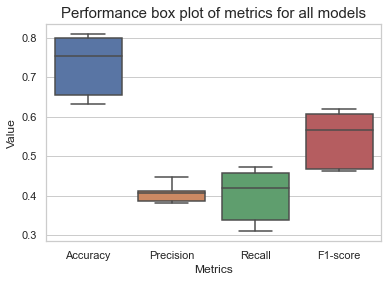

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Metric", y="Value", data=pl_df)

plt.xticks([0,1,2,3], m)
plt.xlabel("Metrics")
plt.title("Performance box plot of metrics for all models", fontsize=15)
# plt.savefig("./images/pl_metrics_boxplot",dpi=300)
plt.show()

In [ ]:
svc_ph_r = get_results(foldername="svc_ph", tname="ph").T
svc_ph_r[3:] = svc_ph_r[3:].mean(axis=0)
cnn_ph_r = get_results(foldername="cnn_ph", tname="ph").T
cnn_ph_r[3:] = cnn_ph_r[3:].mean(axis=0)
lstm_ph_r = get_results(foldername="lstm_ph", tname="ph").T
lstm_ph_r[3:] = lstm_ph_r[3:].mean(axis=0)
cnn_ph_eg_r = get_results(foldername="cnn_ph_eg", tname="ph").T
cnn_ph_eg_r[3:] = cnn_ph_eg_r[3:].mean(axis=0)
lstm_ph_eg_r = get_results(foldername="lstm_ph_eg", tname="ph").T
lstm_ph_eg_r[3:] = lstm_ph_eg_r[3:].mean(axis=0)
a = [svc_ph_r, cnn_ph_r, lstm_ph_r, cnn_ph_eg_r, lstm_ph_eg_r]

In [ ]:
metrics = np.array([])
values = np.array([])
for i in a:
    for inx, s in enumerate(["A", "P", "R", "F"]):
        metrics = np.concatenate((metrics,np.full((10), s)), axis=0)
        values = np.concatenate((values,i[inx]), axis=0)

In [ ]:
ph_df = pd.DataFrame({"Metric":metrics, "Value":values})

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Metric", y="Value", data=ph_df)
# plt.style.use('seaborn')
plt.xticks([0,1,2,3], m)
plt.xlabel("Metric")
plt.title("Performance box plot of metrics for all models across 10k CV", fontsize=15)
plt.savefig("./images/ph_metrics_boxplot",dpi=300)
plt.show()

### F-oneway ANOVA PL

In [38]:
pl_anova = [f_oneway(get_att_maps("cnn_pl_eg", "pl", i, "eg_attributions"), get_att_maps("lstm_pl_eg", "pl", i, "eg_attributions"))[1].mean() for i in [1,2,3,4,5,8]]